In [1]:
import cfar
import math
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

import glob
CACFAR = cfar.cfar().execute_cfar
import sys

In [2]:
paths = glob.glob("/media/nasir/Drive1/code/SAR/AutomatedSARShipDetection/python_cfar/SAR-Ship-Dataset/JPEGImages/*.jpg");


In [ ]:
for index in range(0, len(paths)):
# for index in range(0, 12):
    path = paths[index]
    output_file = path.replace('JPEGImages', 'results')
    box_file = path.replace('JPEGImages', 'detection-results').replace('.jpg', '.txt')
    gt_file = box_file.replace('detection-results', 'ground-truth')
    image = CACFAR(path, output_file, box_file, gt_file, 50, 40, 0.8)
    sys.stdout.write(f"\r {index} / {len(paths)}")
    sys.stdout.flush()
    

 33206 / 43819

In [6]:
gt_file

'/media/nasir/Drive1/code/SAR/AutomatedSARShipDetection/python_cfar/SAR-Ship-Dataset/ground-truth/Sen_ship_vv_0201609080103108.txt'

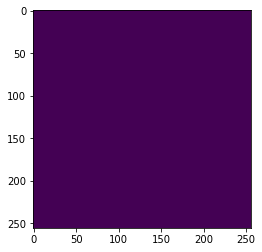

In [5]:
plt.imshow(image)

In [49]:
import cv2

In [56]:
im2, contours, hierarchy = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [51]:
cv2.imshow('ii',image)
cv2.waitKey(-1)

1048608

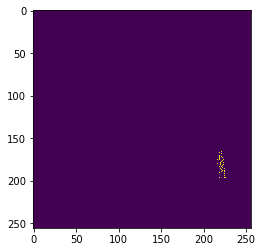

In [57]:
plt.imshow(image)

In [81]:
# temp = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
for c in contours:
    rect = cv2.boundingRect(c)
    if cv2.contourArea(c) < 40: continue
    print(cv2.contourArea(c))
    x,y,w,h = rect
#     cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    cv2.rectangle(image,(x,y),(x+w,y+h),255,2)
#     cv2.putText(temp,'Moth Detected',(x+w+10,y+h),0,0.3,(0,255,0))
# cv2.imshow("Show",image)
# cv2.waitKey()  
# cv2.destroyAllWindows()

49.5


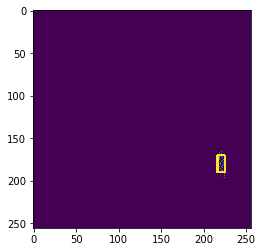

In [82]:
plt.imshow(image)

In [63]:
cv2.imshow("Show",image)
cv2.waitKey()  
cv2.destroyAllWindows()